   Product ID Product Category  Price  Sales Volume  Customer Segment  \
0           1      Electronics    199           150                 1   
1           2      Electronics    299           100                 2   
2           3      Electronics    249           120                 3   
3           4        Furniture    399            80                 1   
4           5        Furniture    499            60                 2   

   Competitor Prices  Age  Income  
0                210   35   50000  
1                320   40   60000  
2                260   28   45000  
3                420   32   70000  
4                520   45   80000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product ID         12 non-null     int64 
 1   Product Category   12 non-null     object
 2   Price              12 non-null     int64 
 3   Sal

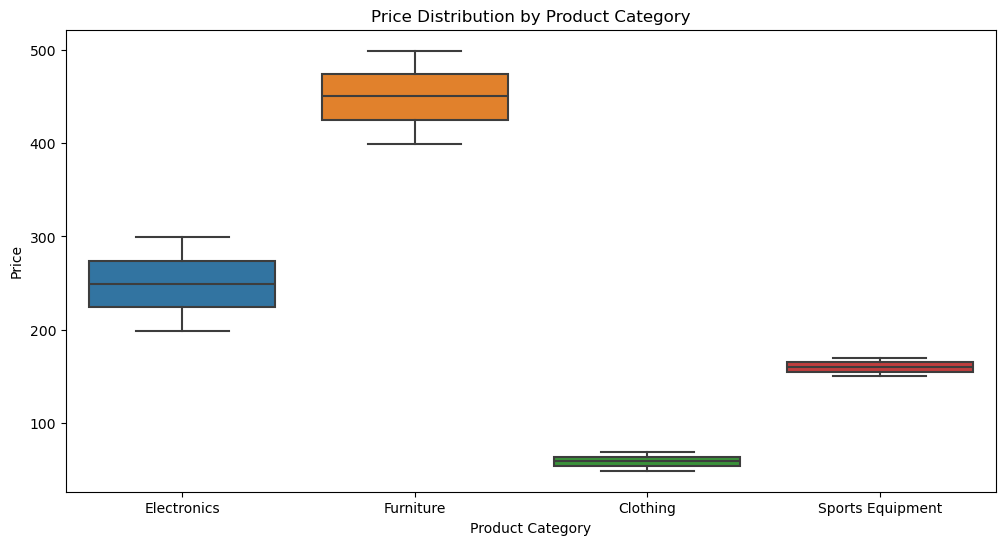

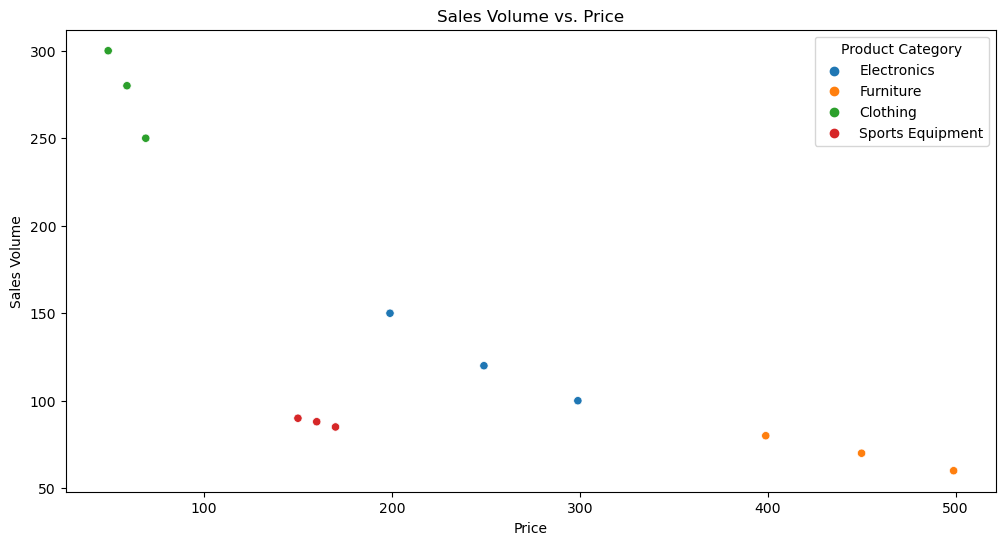

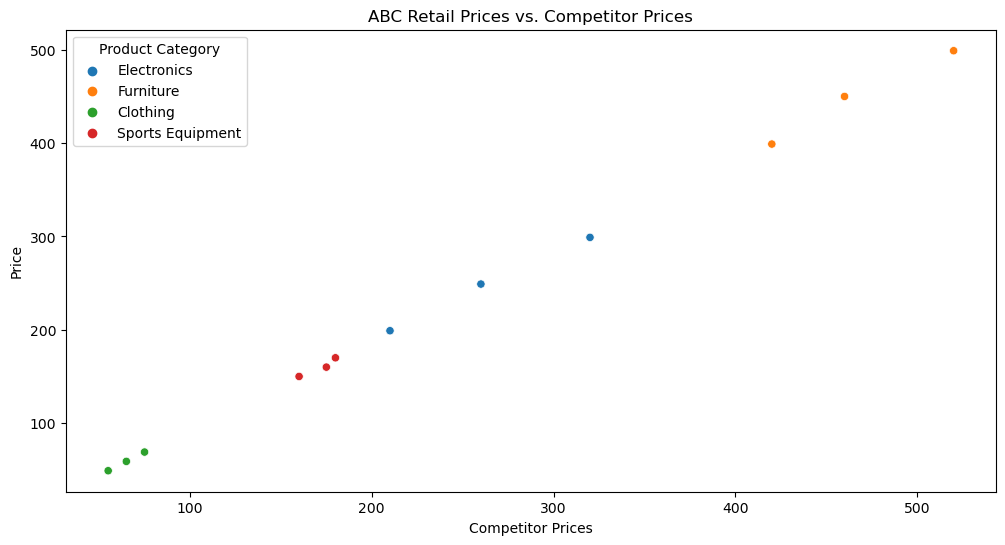

C:\Users\janak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\janak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\janak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\janak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

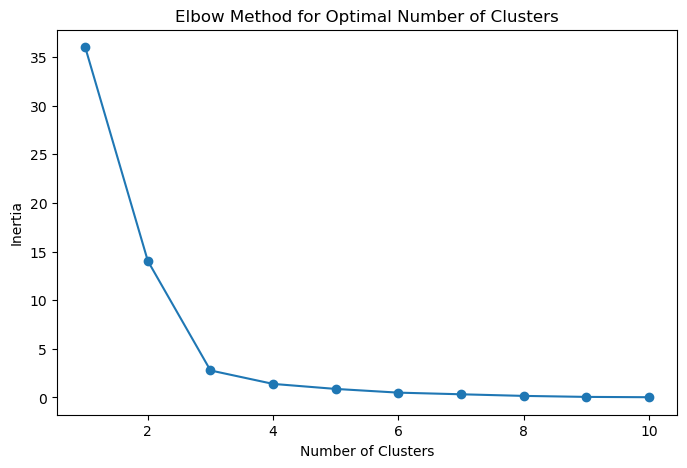

C:\Users\janak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\janak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


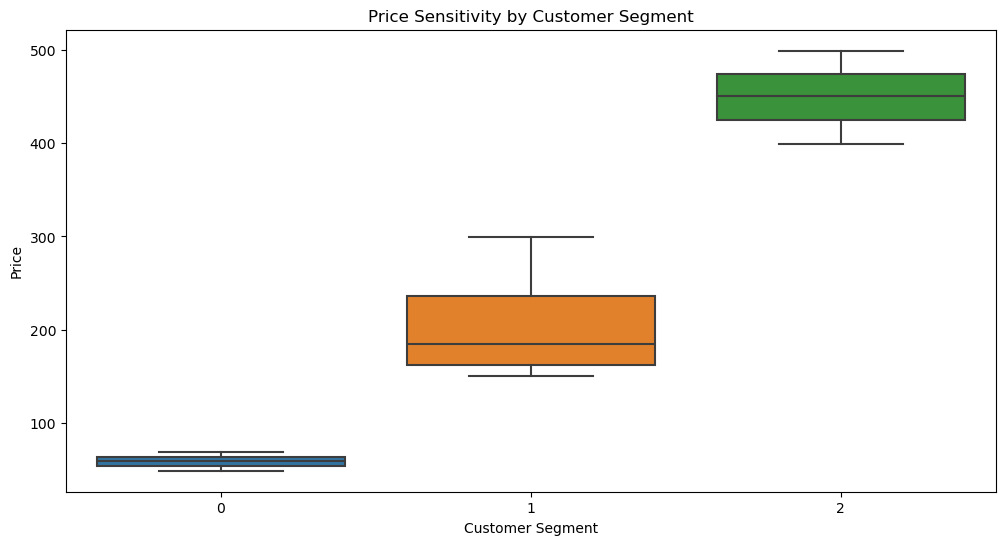

   Product Category  Price Elasticity
0          Clothing         -0.618167
1       Electronics         -0.929667
2         Furniture         -1.347389
3  Sports Equipment         -0.508333
Increase prices for Clothing to maximize revenue.
Increase prices for Electronics to maximize revenue.
Decrease prices for Furniture to increase sales volume.
Increase prices for Sports Equipment to maximize revenue.


In [2]:
# Install necessary packages if not already installed
!pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Create Sample Dataset
data = {
    'Product ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Product Category': ['Electronics', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Furniture', 
                         'Clothing', 'Clothing', 'Clothing', 'Sports Equipment', 'Sports Equipment', 'Sports Equipment'],
    'Price': [199, 299, 249, 399, 499, 450, 49, 69, 59, 150, 170, 160],
    'Sales Volume': [150, 100, 120, 80, 60, 70, 300, 250, 280, 90, 85, 88],
    'Customer Segment': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
    'Competitor Prices': [210, 320, 260, 420, 520, 460, 55, 75, 65, 160, 180, 175],
    'Age': [35, 40, 28, 32, 45, 38, 22, 25, 30, 27, 34, 29],
    'Income': [50000, 60000, 45000, 70000, 80000, 75000, 30000, 35000, 40000, 45000, 50000, 48000]
}

df = pd.DataFrame(data)

# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Step 3: Descriptive Analysis
print(df.groupby('Product Category')['Price'].describe())
print(df.groupby('Product Category')['Sales Volume'].describe())

plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Price', data=df)
plt.title('Price Distribution by Product Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Sales Volume', hue='Product Category', data=df)
plt.title('Sales Volume vs. Price')
plt.show()

# Step 4: Competitor Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Competitor Prices', y='Price', hue='Product Category', data=df)
plt.title('ABC Retail Prices vs. Competitor Prices')
plt.show()

# Step 5: Customer Segmentation
features = df[['Price', 'Sales Volume', 'Competitor Prices']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means clustering
optimal_clusters = 3  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Customer Segment'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer Segment', y='Price', data=df)
plt.title('Price Sensitivity by Customer Segment')
plt.show()

# Step 6: Price Elasticity Analysis
def calculate_price_elasticity(df, category):
    category_data = df[df['Product Category'] == category]
    elasticity = (category_data['Sales Volume'].pct_change() / category_data['Price'].pct_change()).mean()
    return elasticity

# Calculate price elasticity for each product category
price_elasticity = df.groupby('Product Category').apply(lambda x: calculate_price_elasticity(df, x.name))
price_elasticity = price_elasticity.reset_index()
price_elasticity.columns = ['Product Category', 'Price Elasticity']

print(price_elasticity)

# Step 7: Generate Recommendations
def generate_recommendations(price_elasticity):
    recommendations = []
    for index, row in price_elasticity.iterrows():
        category = row['Product Category']
        elasticity = row['Price Elasticity']
        if elasticity < -1:
            recommendations.append(f"Decrease prices for {category} to increase sales volume.")
        elif elasticity > -1:
            recommendations.append(f"Increase prices for {category} to maximize revenue.")
        else:
            recommendations.append(f"Maintain current pricing for {category}.")
    return recommendations

recommendations = generate_recommendations(price_elasticity)
for rec in recommendations:
    print(rec)
